In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tables as tb
from matplotlib import colors 

import sys,os,os.path
sys.path.append("/gluster/data/next/software/IC_311024/")
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
#sys.path.append("/home/e78368jw/Documents/NEXT_CODE/next_misc/")
os.environ['ICTDIR']='/gluster/data/next/software/IC_311024/'

from invisible_cities.io.dst_io           import load_dst, load_dsts, df_writer
from invisible_cities.io.hits_io          import hits_writer
from invisible_cities.reco                import tbl_functions   as tbl
from invisible_cities.core.core_functions import in_range
from invisible_cities.evm.nh5             import HitsTable

In [3]:
folder_path = '/gluster/data/next/files/TOPOLOGY_John/HYPPOS_DATA_QTHR/BEERSHEBA_STUDY/e_cut/blobR_voxelS/b27v9/PORT_1a/isaura/'

In [ ]:
full_dst = []
full_runinfo = []
        
    
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.h5')]
print("Loading data...") 
#print(q)
#print(folder_path + q)
try:
    x = load_dsts([folder_path + x for x in file_names], 'Tracking', 'Tracks')
except Exception as e:
    print(f"Loading this DST broke, error: {e}")

print("Loaded data! Selecting Tl events...")
 

Loading data...
Loaded data! Selecting Tl events...


In [6]:
posi_dir = '/gluster/data/next/notebooks/john_books/soph_df_data/'
#true_info_labels = ['1a_Tl_signal_true_info.h5', '1b_Tl_signal_true_info.h5', '2b_Tl_signal_true_info.h5']
true_info_labels = ['1a_Tl_signal_true_info.h5']
pos_events = []

for i in range(len(true_info_labels)):
    port_id = true_info_labels[i][:2]
    data = pd.read_hdf(posi_dir + true_info_labels[i])
    data['PORT'] = str(port_id)
    if (i == 0):
        pos_events.append(data)
    else:
        # alter the event numbers
        pos_events.append(data)
        
print(f'Positron events in {port_id}: {data.event_id.nunique()}')

pos_events = pd.concat(pos_events, axis = 0, ignore_index = True)
# double to match the tracking info
pos_events.event_id = pos_events['event_id']*2
 

Positron events in 1a: 6175


In [9]:
pos_ids = pos_events['event_id'].unique()        
sig_data = x[x['event'].isin(pos_ids)]
print("Signal data selected, creating plot of drift time against track length...")    

display(sig_data)

Signal data selected, creating plot of drift time against track length...


,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
18,16,0,1.326230,99.084514,182,15581,1,246.875,153.575,730.640203,...,771.019071,327.600522,216.315452,754.235355,0.352077,0.351978,0.000000,8.454545,8.333333,8.882588
64,64,0,1.593057,65.285328,73,6923,3,162.875,309.575,316.141678,...,363.342705,176.826888,356.708768,322.208061,1.020729,0.391370,0.000000,8.833333,9.000000,8.956283
65,64,1,0.101505,15.467475,5,481,3,279.875,236.575,738.061209,...,747.352428,291.570187,241.776741,743.971566,0.101505,0.101505,0.101505,8.833333,9.000000,8.956283
66,64,2,0.034125,9.000000,2,313,3,357.875,272.575,782.011913,...,787.591281,363.724014,285.265788,786.111261,0.034125,0.034125,0.034125,8.833333,9.000000,8.956283
67,66,0,0.635739,49.965079,83,6733,1,272.875,278.575,523.984880,...,528.909236,290.750556,297.559093,568.789890,0.348973,0.306254,0.073174,7.833333,8.000000,8.234007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198203,5920668,0,1.597811,161.256448,149,11035,4,-181.125,212.575,422.952895,...,442.585646,-141.111226,290.466262,426.629842,0.609290,0.472121,0.000000,8.771429,8.843750,8.928912
198204,5920668,1,0.249978,17.687500,6,723,4,103.875,162.575,175.498969,...,178.234246,112.658734,178.880640,178.929613,0.249978,0.249978,0.249978,8.771429,8.843750,8.928912
198205,5920668,2,0.107077,12.455917,4,473,4,-38.125,416.575,145.823180,...,147.068648,-28.205966,427.545480,147.771424,0.107077,0.107077,0.107077,8.771429,8.843750,8.928912
198206,5920668,3,0.029522,0.000000,1,120,4,117.875,159.575,200.562961,...,203.201486,120.678462,162.812522,203.201486,0.029522,0.029522,0.029522,8.771429,8.843750,8.928912


Text(0, 0.5, 'z-spread min/max')

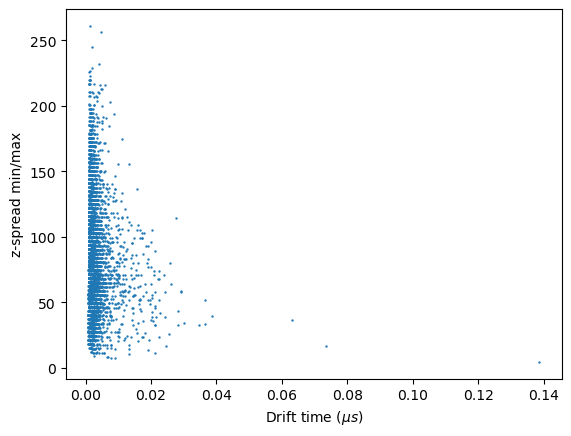

In [24]:
v_d = 1.05 # mm per microsecond
drift_time = []
t_length = []
# you now have signal data
for evt, df in sig_data.groupby('event'):
    drift_time.append(v_d/df.iloc[0].z_ave)
    t_length.append(df.iloc[0].z_max - df.iloc[0].z_min)


plt.scatter(drift_time, t_length, s = 0.5)
plt.xlabel('Drift time ($\mu s$)')
plt.ylabel("z-spread min/max")
#plt.xlim([0, 0.02])

Text(0.5, 0, 'z-spread min/max per track (mm)')

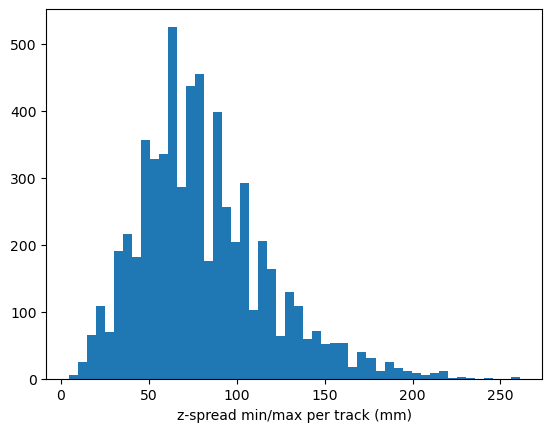

In [22]:
plt.hist(t_length, bins = 50)
plt.xlabel('z-spread min/max per track (mm)')

Text(0.5, 0, 'z-spread min/max per track ($\\mu$s)')

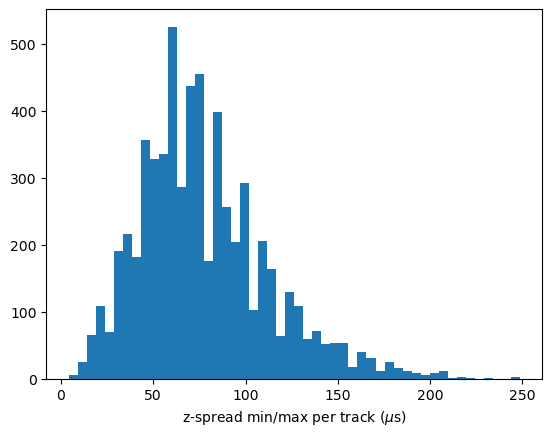

In [23]:
plt.hist([x/v_d for x in t_length], bins = 50)
plt.xlabel('z-spread min/max per track ($\mu$s)')